<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Creating-df_rape" data-toc-modified-id="Creating-df_rape-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating df_rape</a></span></li><li><span><a href="#Data-Cleanup" data-toc-modified-id="Data-Cleanup-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleanup</a></span></li><li><span><a href="#Creation-of-datetime-column" data-toc-modified-id="Creation-of-datetime-column-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creation of datetime column</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Visualization</a></span></li></ul></div>

In [ ]:
# Note: A 538 Article on Sexual Assault
# https://projects.fivethirtyeight.com/sexual-assault-victims/

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Data from https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory Data Analysis

In [3]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [4]:
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,71.0,FRONT OF,DRUG STORE,NaN,NaN,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)"
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,7.0,OPPOSITE OF,STREET,NaN,NaN,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)"
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,46.0,FRONT OF,STREET,NaN,NaN,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)"
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,48.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)"
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,19.0,INSIDE,DRUG STORE,NaN,NaN,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)"


In [5]:
df.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
PARKS_NM              object
HADEVELOPT            object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lat_Lon               object
dtype: object

In [6]:
# Taking the subset of this data, the 16673 rows specifically about rape
df['OFNS_DESC'].value_counts()

PETIT LARCENY                           987326
HARRASSMENT 2                           736479
ASSAULT 3 & RELATED OFFENSES            625624
CRIMINAL MISCHIEF & RELATED OF          603977
GRAND LARCENY                           516544
DANGEROUS DRUGS                         392992
OFF. AGNST PUB ORD SENSBLTY &           327716
ROBBERY                                 228220
FELONY ASSAULT                          224921
BURGLARY                                216439
MISCELLANEOUS PENAL LAW                 145888
DANGEROUS WEAPONS                       143395
OFFENSES AGAINST PUBLIC ADMINI          117062
GRAND LARCENY OF MOTOR VEHICLE          114071
INTOXICATED & IMPAIRED DRIVING           85349
CRIMINAL TRESPASS                        74083
VEHICLE AND TRAFFIC LAWS                 72173
SEX CRIMES                               68020
THEFT-FRAUD                              66184
FORGERY                                  61024
FRAUDS                                   38308
POSSESSION OF

In [ ]:
# CHECK NULLS

In [ ]:
# Non-meaningful columns that need to be deleted 
# KY_CD: Meaningless- identical in subset of rape data
# PD_DESC: identical to PD_CD
# LAW_CAT_CD
# JURIS_DESC
# LOC_OF_OCCUR_DESC
# PARKS_NM
# HADEVELOPT
# X_COORD_CD
# Y_COORD_CD
# Latitude
# Longitude
# Lat_Lon

In [14]:
df = df.drop(['KY_CD','PD_DESC','LAW_CAT_CD','JURIS_DESC','LOC_OF_OCCUR_DESC','PARKS_NM','HADEVELOPT','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','Lat_Lon'], axis = 1)

# Creating df_rape

In [15]:
df_rape = df.loc[df['OFNS_DESC'] == 'RAPE']

In [16]:
df_rape.shape

(16673, 12)

In [17]:
df_rape.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
21,340513307,04/06/2015,12:00:00,04/10/2015,18:00:00,12/21/2015,RAPE,155.0,COMPLETED,QUEENS,110.0,OTHER
252,198273659,12/01/2009,10:00:00,01/01/2010,10:00:00,12/07/2015,RAPE,157.0,COMPLETED,BROOKLYN,66.0,RESIDENCE - APT. HOUSE
821,591506102,12/30/2015,18:00:00,12/30/2015,23:00:00,12/31/2015,RAPE,157.0,COMPLETED,QUEENS,102.0,RESIDENCE-HOUSE
1079,283109223,08/01/2015,00:01:00,12/30/2015,22:25:00,12/31/2015,RAPE,153.0,COMPLETED,MANHATTAN,25.0,RESIDENCE - APT. HOUSE
1754,361697946,12/30/2015,03:04:00,12/30/2015,05:19:00,12/30/2015,RAPE,157.0,COMPLETED,MANHATTAN,20.0,HOTEL/MOTEL


In [18]:
# The outcome variable, rape completed vs attempted
df_rape['CRM_ATPT_CPTD_CD'].value_counts()

COMPLETED    14843
ATTEMPTED     1830
Name: CRM_ATPT_CPTD_CD, dtype: int64

In [19]:
df_rape.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_DT           1
CMPLNT_FR_TM           0
CMPLNT_TO_DT        3604
CMPLNT_TO_TM        3598
RPT_DT                 0
OFNS_DESC              0
PD_CD                  0
CRM_ATPT_CPTD_CD       0
BORO_NM                4
ADDR_PCT_CD            4
PREM_TYP_DESC         63
dtype: int64

In [ ]:
# Any 24:00:00 times need to be cleaned up so Timestamps can be made

In [20]:
(df_rape['CMPLNT_FR_TM'] == '24:00:00').value_counts(sort = True)

False    16654
True        19
Name: CMPLNT_FR_TM, dtype: int64

In [21]:
(df_rape['CMPLNT_TO_TM'] == '24:00:00').value_counts(sort = True)

False    16614
True        59
Name: CMPLNT_TO_TM, dtype: int64

In [22]:
df_rape.loc[df_rape['CMPLNT_FR_DT'].isna()]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
1008394,155379861,NaN,06:00:00,12/02/2013,06:30:00,12/02/2013,RAPE,159.0,ATTEMPTED,BROOKLYN,90.0,RESIDENCE - APT. HOUSE


# Data Cleanup

In [ ]:
# In situations where the From Date is Null, change to to date

In [23]:
# Get rid of a troublesome na
df_rape.loc[df_rape['CMPLNT_FR_DT'].isna(), 'CMPLNT_FR_DT'] = df_rape.loc[df_rape['CMPLNT_FR_DT'].isna(), 'CMPLNT_TO_DT']

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [24]:
df_rape.loc[df_rape['CMPLNT_FR_DT'].isna()]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC


In [25]:
# Get rid of troublesome 24:00:00 values in 'From Time'
df_rape.loc[df_rape['CMPLNT_FR_TM'] == '24:00:00', 'CMPLNT_FR_TM'] = '23:59:59'

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
# Get rid of troublesome 24:00:00 values in 'To Time'
df_rape.loc[df_rape['CMPLNT_TO_TM'] == '24:00:00', 'CMPLNT_TO_TM'] = '23:59:59'

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
# Check cells
df_rape.sort_values(by='CMPLNT_FR_TM', ascending=False)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
3466499,829061498,06/01/2002,23:59:59,01/06/2009,15:35:00,01/21/2009,RAPE,157.0,COMPLETED,STATEN ISLAND,122.0,RESIDENCE-HOUSE
3894448,268184195,03/30/2008,23:59:59,NaN,NaN,03/31/2008,RAPE,157.0,COMPLETED,MANHATTAN,34.0,RESIDENCE - PUBLIC HOUSING
3659304,674449658,11/28/2007,23:59:59,NaN,NaN,09/05/2008,RAPE,153.0,COMPLETED,STATEN ISLAND,120.0,RESIDENCE - APT. HOUSE
3838102,937145860,10/12/2007,23:59:59,NaN,NaN,05/09/2008,RAPE,157.0,COMPLETED,MANHATTAN,6.0,RESIDENCE - APT. HOUSE
3379603,282308644,01/01/2004,23:59:59,12/31/2004,23:59:00,03/26/2009,RAPE,157.0,COMPLETED,BROOKLYN,67.0,RESIDENCE-HOUSE
3601184,357409136,01/01/2007,23:59:59,10/13/2008,23:59:59,10/14/2008,RAPE,157.0,COMPLETED,MANHATTAN,34.0,RESIDENCE - APT. HOUSE
3441876,965083518,11/01/2008,23:59:59,11/15/2008,23:59:59,02/09/2009,RAPE,157.0,COMPLETED,QUEENS,105.0,RESIDENCE - APT. HOUSE
3179713,678406708,04/01/2004,23:59:59,06/01/2005,23:59:00,08/12/2009,RAPE,157.0,COMPLETED,QUEENS,113.0,RESIDENCE-HOUSE
4153011,833029701,08/29/2007,23:59:59,NaN,NaN,10/03/2007,RAPE,157.0,COMPLETED,BRONX,47.0,RESIDENCE - PUBLIC HOUSING
4011256,266934295,10/31/2007,23:59:59,NaN,NaN,01/09/2008,RAPE,157.0,COMPLETED,BROOKLYN,70.0,RESIDENCE - APT. HOUSE


In [28]:
df_rape.sort_values(by='CMPLNT_TO_TM', ascending=False)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
3841350,618252524,05/24/2006,09:00:00,01/01/2008,23:59:59,05/07/2008,RAPE,155.0,COMPLETED,BRONX,48.0,RESIDENCE - APT. HOUSE
3439084,763217678,09/01/2008,23:59:59,01/12/2009,23:59:59,02/11/2009,RAPE,153.0,COMPLETED,STATEN ISLAND,120.0,RESIDENCE-HOUSE
3440507,203276462,01/10/2009,00:01:00,01/10/2009,23:59:59,02/10/2009,RAPE,153.0,COMPLETED,QUEENS,115.0,RESIDENCE-HOUSE
3656480,606699261,01/01/2005,15:00:00,04/30/2008,23:59:59,09/07/2008,RAPE,157.0,COMPLETED,BRONX,50.0,RESIDENCE - APT. HOUSE
4201880,155768460,07/07/2007,20:00:00,07/08/2007,23:59:59,09/02/2007,RAPE,155.0,COMPLETED,BRONX,47.0,RESIDENCE-HOUSE
3441876,965083518,11/01/2008,23:59:59,11/15/2008,23:59:59,02/09/2009,RAPE,157.0,COMPLETED,QUEENS,105.0,RESIDENCE - APT. HOUSE
4046403,576727230,12/13/2007,18:00:00,12/14/2007,23:59:59,12/14/2007,RAPE,153.0,COMPLETED,BROOKLYN,83.0,RESIDENCE - APT. HOUSE
4313564,570578651,07/01/2006,10:00:00,04/01/2007,23:59:59,06/21/2007,RAPE,153.0,COMPLETED,STATEN ISLAND,122.0,RESIDENCE-HOUSE
3445603,597213125,05/01/2008,00:01:00,12/20/2008,23:59:59,02/06/2009,RAPE,153.0,COMPLETED,MANHATTAN,23.0,RESIDENCE - PUBLIC HOUSING
3887411,375676496,06/01/2003,15:00:00,06/30/2004,23:59:59,04/05/2008,RAPE,157.0,COMPLETED,BRONX,44.0,RESIDENCE - APT. HOUSE


In [29]:
# Get rid of troublesome '1016' date value
format_check = df_rape.CMPLNT_FR_DT.str.extract('^(\d{2})/(\d{2})/(\d{4})')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [30]:
# Check the rest of the years
format_check[2].unique()

array(['2015', '2009', '2012', '2008', '2014', '2006', '2013', '2010',
       '2002', '1993', '2011', '2007', '2003', '2000', '2005', '2004',
       '2001', '1999', '1975', '1996', '1997', '1992', '1998', '1990',
       '1994', '1988', '1995', '1989', '1978', '1991', '2016', '1984',
       '1980', '1986', '1016', '1983', '2017', '1973', '1968', '1967',
       '1976', '1981', '1987', '1977'], dtype=object)

In [31]:
# Year 1016 must be deleted for conversion
df_rape['CMPLNT_FR_DT'] = df_rape['CMPLNT_FR_DT'].str.replace('1016','2016')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
df_rape

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
21,340513307,04/06/2015,12:00:00,04/10/2015,18:00:00,12/21/2015,RAPE,155.0,COMPLETED,QUEENS,110.0,OTHER
252,198273659,12/01/2009,10:00:00,01/01/2010,10:00:00,12/07/2015,RAPE,157.0,COMPLETED,BROOKLYN,66.0,RESIDENCE - APT. HOUSE
821,591506102,12/30/2015,18:00:00,12/30/2015,23:00:00,12/31/2015,RAPE,157.0,COMPLETED,QUEENS,102.0,RESIDENCE-HOUSE
1079,283109223,08/01/2015,00:01:00,12/30/2015,22:25:00,12/31/2015,RAPE,153.0,COMPLETED,MANHATTAN,25.0,RESIDENCE - APT. HOUSE
1754,361697946,12/30/2015,03:04:00,12/30/2015,05:19:00,12/30/2015,RAPE,157.0,COMPLETED,MANHATTAN,20.0,HOTEL/MOTEL
2086,449252466,12/28/2015,18:00:00,12/28/2015,19:00:00,12/30/2015,RAPE,157.0,COMPLETED,BROOKLYN,70.0,RESIDENCE - APT. HOUSE
2269,841076951,11/27/2015,20:00:00,NaN,NaN,12/30/2015,RAPE,153.0,COMPLETED,MANHATTAN,26.0,RESIDENCE - PUBLIC HOUSING
2716,462568423,12/29/2015,15:30:00,NaN,NaN,12/29/2015,RAPE,159.0,ATTEMPTED,BRONX,41.0,RESIDENCE - APT. HOUSE
3199,632341905,12/28/2015,20:00:00,12/28/2015,20:30:00,12/29/2015,RAPE,157.0,COMPLETED,QUEENS,109.0,RESIDENCE - APT. HOUSE
3346,706551270,12/26/2015,02:30:00,12/26/2015,06:00:00,12/29/2015,RAPE,155.0,COMPLETED,MANHATTAN,19.0,RESIDENCE - APT. HOUSE


# Creation of datetime column

In [ ]:
# CMPLNT_datetime_series_FR and CMPLNT_datetime_series_TO are 
# concatenated strings

In [34]:
CMPLNT_datetime_series_FR = df_rape['CMPLNT_FR_DT'] + ' ' + df_rape['CMPLNT_FR_TM']

In [35]:
CMPLNT_datetime_series_TO = df_rape['CMPLNT_TO_DT'] + ' ' + df_rape['CMPLNT_TO_TM']

In [36]:
# Two strings to convers to Timestamp
print(type(CMPLNT_datetime_series_FR[21]), type(CMPLNT_datetime_series_TO[21]))

<class 'str'> <class 'str'>


In [37]:
pd.to_datetime(CMPLNT_datetime_series_FR, infer_datetime_format=True)

21        2015-04-06 12:00:00
252       2009-12-01 10:00:00
821       2015-12-30 18:00:00
1079      2015-08-01 00:01:00
1754      2015-12-30 03:04:00
2086      2015-12-28 18:00:00
2269      2015-11-27 20:00:00
2716      2015-12-29 15:30:00
3199      2015-12-28 20:00:00
3346      2015-12-26 02:30:00
4024      2015-12-27 21:30:00
4281      2015-12-28 02:40:00
5617      2015-12-27 01:00:00
5674      2015-12-26 23:30:00
5686      2015-12-26 23:00:00
5879      2015-12-25 06:00:00
5885      2015-12-25 02:00:00
5991      2015-11-03 12:00:00
6015      2015-07-20 12:00:00
6576      2015-12-26 09:25:00
6634      2015-12-26 05:00:00
7601      2015-12-25 04:00:00
7602      2015-12-25 02:30:00
7853      2015-12-24 17:30:00
7874      2015-10-12 00:01:00
8118      2015-12-24 18:00:00
8565      2015-12-24 03:25:00
9134      2015-11-19 23:00:00
10186     2015-10-01 12:00:00
10201     2015-06-03 01:00:00
                  ...        
6040310   2017-01-01 00:01:00
6040425   2017-01-07 21:00:00
6040838   

In [38]:
pd.to_datetime(CMPLNT_datetime_series_TO, infer_datetime_format=True)

21        2015-04-10 18:00:00
252       2010-01-01 10:00:00
821       2015-12-30 23:00:00
1079      2015-12-30 22:25:00
1754      2015-12-30 05:19:00
2086      2015-12-28 19:00:00
2269                      NaT
2716                      NaT
3199      2015-12-28 20:30:00
3346      2015-12-26 06:00:00
4024      2015-12-27 22:00:00
4281      2015-12-28 03:00:00
5617      2015-12-27 01:20:00
5674                      NaT
5686      2015-12-27 06:40:00
5879      2015-12-25 09:00:00
5885      2015-12-25 03:00:00
5991      2015-11-03 13:00:00
6015                      NaT
6576      2015-12-26 09:30:00
6634                      NaT
7601      2015-12-25 04:30:00
7602      2015-12-25 06:00:00
7853      2015-12-25 07:30:00
7874      2015-10-12 23:59:00
8118      2015-12-24 18:30:00
8565      2015-12-24 03:40:00
9134      2015-11-19 23:59:00
10186     2015-10-31 12:00:00
10201     2015-06-03 02:00:00
                  ...        
6040310   2017-01-05 23:59:00
6040425                   NaT
6040838   

In [39]:
df_rape['CMPLNT_FR_DATETIME'] = CMPLNT_datetime_series_FR

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_rape['CMPLNT_TO_DATETIME'] = CMPLNT_datetime_series_TO

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
df_rape

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC,CMPLNT_FR_DATETIME,CMPLNT_TO_DATETIME
21,340513307,04/06/2015,12:00:00,04/10/2015,18:00:00,12/21/2015,RAPE,155.0,COMPLETED,QUEENS,110.0,OTHER,04/06/2015 12:00:00,04/10/2015 18:00:00
252,198273659,12/01/2009,10:00:00,01/01/2010,10:00:00,12/07/2015,RAPE,157.0,COMPLETED,BROOKLYN,66.0,RESIDENCE - APT. HOUSE,12/01/2009 10:00:00,01/01/2010 10:00:00
821,591506102,12/30/2015,18:00:00,12/30/2015,23:00:00,12/31/2015,RAPE,157.0,COMPLETED,QUEENS,102.0,RESIDENCE-HOUSE,12/30/2015 18:00:00,12/30/2015 23:00:00
1079,283109223,08/01/2015,00:01:00,12/30/2015,22:25:00,12/31/2015,RAPE,153.0,COMPLETED,MANHATTAN,25.0,RESIDENCE - APT. HOUSE,08/01/2015 00:01:00,12/30/2015 22:25:00
1754,361697946,12/30/2015,03:04:00,12/30/2015,05:19:00,12/30/2015,RAPE,157.0,COMPLETED,MANHATTAN,20.0,HOTEL/MOTEL,12/30/2015 03:04:00,12/30/2015 05:19:00
2086,449252466,12/28/2015,18:00:00,12/28/2015,19:00:00,12/30/2015,RAPE,157.0,COMPLETED,BROOKLYN,70.0,RESIDENCE - APT. HOUSE,12/28/2015 18:00:00,12/28/2015 19:00:00
2269,841076951,11/27/2015,20:00:00,NaN,NaN,12/30/2015,RAPE,153.0,COMPLETED,MANHATTAN,26.0,RESIDENCE - PUBLIC HOUSING,11/27/2015 20:00:00,NaN
2716,462568423,12/29/2015,15:30:00,NaN,NaN,12/29/2015,RAPE,159.0,ATTEMPTED,BRONX,41.0,RESIDENCE - APT. HOUSE,12/29/2015 15:30:00,NaN
3199,632341905,12/28/2015,20:00:00,12/28/2015,20:30:00,12/29/2015,RAPE,157.0,COMPLETED,QUEENS,109.0,RESIDENCE - APT. HOUSE,12/28/2015 20:00:00,12/28/2015 20:30:00
3346,706551270,12/26/2015,02:30:00,12/26/2015,06:00:00,12/29/2015,RAPE,155.0,COMPLETED,MANHATTAN,19.0,RESIDENCE - APT. HOUSE,12/26/2015 02:30:00,12/26/2015 06:00:00


In [42]:
df_rape['CMPLNT_FR_DATETIME'] = pd.to_datetime(df_rape['CMPLNT_FR_DATETIME'], infer_datetime_format=True)
df_rape['CMPLNT_TO_DATETIME'] = pd.to_datetime(df_rape['CMPLNT_TO_DATETIME'], infer_datetime_format=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
type(df_rape['CMPLNT_TO_DATETIME'][21])

pandas._libs.tslib.Timestamp

In [45]:
# Which years the crimes were committed, in case I need to think about
# subsets for an accurate analysis
# Looks like cutting data to 2006 - 2018 is more meaningful
df_rape['CMPLNT_FR_DATETIME'].dt.year.value_counts(ascending = False)


2006    1539
2011    1407
2012    1394
2010    1378
2013    1338
2015    1333
2007    1276
2016    1268
2008    1265
2014    1258
2009    1190
2017    1160
2005     316
2004     117
2003     102
2001      66
2002      64
2000      44
1999      44
1998      30
1997      15
1993      14
1996      12
1994       7
1995       5
1992       4
1991       3
1975       2
1989       2
1984       2
1983       2
1988       2
1990       2
1978       2
1986       2
1981       1
1967       1
1987       1
1980       1
1977       1
1976       1
1973       1
1968       1
Name: CMPLNT_FR_DATETIME, dtype: int64

In [56]:
df_rape['CMPLNT_FR_DATETIME'].dt.year.value_counts()

2006    1539
2011    1407
2012    1394
2010    1378
2013    1338
2015    1333
2007    1276
2016    1268
2008    1265
2014    1258
2009    1190
2017    1160
2005     316
2004     117
2003     102
2001      66
2002      64
2000      44
1999      44
1998      30
1997      15
1993      14
1996      12
1994       7
1995       5
1992       4
1991       3
1975       2
1989       2
1984       2
1983       2
1988       2
1990       2
1978       2
1986       2
1981       1
1967       1
1987       1
1980       1
1977       1
1976       1
1973       1
1968       1
Name: CMPLNT_FR_DATETIME, dtype: int64

In [54]:
((df_rape['CMPLNT_FR_DATETIME'].dt.year >= 2005) == True).sum()

16122

In [55]:
((df_rape['CMPLNT_FR_DATETIME'].dt.year >= 2005) == False).sum()

551

In [57]:
# Delete everything before 2005
df_rape = df_rape.drop(df_rape[df_rape['CMPLNT_FR_DATETIME'].dt.year < 2005].index)

# df_rape.loc[df_rape.Name.isin(['Alisa', 'James', 'Nick'])]

In [58]:
((df_rape['CMPLNT_FR_DATETIME'].dt.year >= 2005) == False).sum()

0

In [59]:
df_rape.isnull().sum()

CMPLNT_NUM               0
CMPLNT_FR_DT             0
CMPLNT_FR_TM             0
CMPLNT_TO_DT          3486
CMPLNT_TO_TM          3480
RPT_DT                   0
OFNS_DESC                0
PD_CD                    0
CRM_ATPT_CPTD_CD         0
BORO_NM                  3
ADDR_PCT_CD              3
PREM_TYP_DESC           61
CMPLNT_FR_DATETIME       0
CMPLNT_TO_DATETIME    3493
dtype: int64

In [60]:
# The outcome variable, rape completed vs attempted
df_rape['CRM_ATPT_CPTD_CD'].value_counts()

COMPLETED    14312
ATTEMPTED     1810
Name: CRM_ATPT_CPTD_CD, dtype: int64

In [74]:
# Convert time between RPT_DT and CMPLNT_FR_DATETIME to report to a continuous variable
df_rape.dtypes

CMPLNT_NUM                      int64
CMPLNT_FR_DT                   object
CMPLNT_FR_TM                   object
CMPLNT_TO_DT                   object
CMPLNT_TO_TM                   object
RPT_DT                 datetime64[ns]
OFNS_DESC                      object
PD_CD                         float64
CRM_ATPT_CPTD_CD               object
BORO_NM                        object
ADDR_PCT_CD                   float64
PREM_TYP_DESC                  object
CMPLNT_FR_DATETIME     datetime64[ns]
CMPLNT_TO_DATETIME     datetime64[ns]
TIME_TO_REPORT        timedelta64[ns]
dtype: object

In [71]:
df_rape['RPT_DT']

21        2015-12-21
252       2015-12-07
821       2015-12-31
1079      2015-12-31
1754      2015-12-30
2086      2015-12-30
2269      2015-12-30
2716      2015-12-29
3199      2015-12-29
3346      2015-12-29
4024      2015-12-28
4281      2015-12-28
5617      2015-12-27
5674      2015-12-27
5686      2015-12-27
5879      2015-12-27
5885      2015-12-27
5991      2015-12-27
6015      2015-12-27
6576      2015-12-26
6634      2015-12-26
7601      2015-12-25
7602      2015-12-25
7853      2015-12-25
7874      2015-12-19
8118      2015-12-24
8565      2015-12-24
9134      2015-12-16
10186     2015-12-23
10201     2015-12-23
             ...    
6040310   2017-01-08
6040425   2017-01-07
6040838   2017-01-07
6041810   2017-01-06
6042022   2017-01-06
6042246   2017-01-06
6042481   2017-01-06
6043297   2017-01-05
6043679   2017-01-05
6043850   2017-01-05
6043853   2017-01-05
6044850   2017-01-04
6045256   2017-01-04
6045257   2017-01-04
6045948   2017-01-03
6045964   2017-01-03
6045989   201

In [66]:
# convert to Timestamp in seconds
df_rape['RPT_DT'] = pd.to_datetime(df_rape['RPT_DT'], infer_datetime_format=True)


In [70]:
df_rape['RPT_DT'].dt.year.value_counts()
     

2012    1430
2015    1429
2017    1413
2016    1413
2006    1393
2011    1379
2013    1360
2010    1333
2014    1331
2007    1254
2008    1236
2009    1151
Name: RPT_DT, dtype: int64

In [72]:
# Difference between report date and beginning of attemped/completed crime
df_rape['TIME_TO_REPORT'] = df_rape['RPT_DT'] - df_rape['CMPLNT_FR_DATETIME']

In [ ]:
df_rape['TIME_TO_REPORT']dt.year

In [73]:
df_rape['TIME_TO_REPORT'].value_counts()

-1 days +21:00:00     275
-1 days +22:00:00     264
-1 days +20:00:00     239
-1 days +23:00:00     210
0 days 01:00:00       182
0 days 02:00:00       170
-1 days +19:00:00     169
-1 days +23:59:00     137
0 days 04:00:00       128
-1 days +18:00:00     126
0 days 03:00:00       125
-1 days +23:30:00     119
-1 days +19:30:00     114
-1 days +21:30:00     113
-1 days +20:30:00     105
-1 days +22:30:00     101
-1 days +12:00:00      97
-1 days +18:30:00      92
0 days 00:30:00        83
0 days 05:00:00        82
-1 days +16:00:00      81
0 days 06:00:00        80
0 days 00:00:00        77
-1 days +14:00:00      77
0 days 01:30:00        74
-1 days +10:00:00      73
-1 days +11:00:00      73
0 days 02:30:00        72
-1 days +08:00:00      71
0 days 07:00:00        70
                     ... 
60 days 11:00:00        1
-1 days +18:46:00       1
-1 days +07:25:00       1
47 days 00:30:00        1
852 days 22:00:00       1
125 days 14:00:00       1
304 days 23:59:00       1
141 days 22:

In [75]:
# Convert... to seconds? minutes? days?
df_rape['TIME_TO_REPORT']

21         258 days 12:00:00
252       2196 days 14:00:00
821          0 days 06:00:00
1079       151 days 23:59:00
1754       -1 days +20:56:00
2086         1 days 06:00:00
2269        32 days 04:00:00
2716       -1 days +08:30:00
3199         0 days 04:00:00
3346         2 days 21:30:00
4024         0 days 02:30:00
4281       -1 days +21:20:00
5617       -1 days +23:00:00
5674         0 days 00:30:00
5686         0 days 01:00:00
5879         1 days 18:00:00
5885         1 days 22:00:00
5991        53 days 12:00:00
6015       159 days 12:00:00
6576       -1 days +14:35:00
6634       -1 days +19:00:00
7601       -1 days +20:00:00
7602       -1 days +21:30:00
7853         0 days 06:30:00
7874        67 days 23:59:00
8118       -1 days +06:00:00
8565       -1 days +20:35:00
9134        26 days 01:00:00
10186       82 days 12:00:00
10201      202 days 23:00:00
                 ...        
6040310      6 days 23:59:00
6040425    -1 days +03:00:00
6040838    -1 days +20:00:00
6041810    -1 

# Data Visualization

In [76]:
# library & dataset
import seaborn as sns

In [78]:
df_rape_viz = np.array(pd.to_datetime(df_rape['CMPLNT_FR_DATETIME']), dtype=np.datetime64)

In [84]:
df_rape_viz.shape

(16122,)

In [86]:
type(df_rape_viz[21])

numpy.datetime64

In [ ]:
data.groupby(['col1', 'col2'])['col3'].mean()

In [124]:
df_rape.groupby(['BORO_NM'])

In [ ]:
df_rape.groupby(['BORO_NM'])

In [92]:
df_rape.groupby('BORO_NM').count()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,ADDR_PCT_CD,PREM_TYP_DESC,CMPLNT_FR_DATETIME,CMPLNT_TO_DATETIME,TIME_TO_REPORT
BORO_NM,,,,,,,,,,,,,,
BRONX,3580,3580,3580,2555,2554,3580,3580,3580,3580,3580,3561,3580,2552,3580
BROOKLYN,4820,4820,4820,3820,3828,4820,4820,4820,4820,4820,4805,4820,3819,4820
MANHATTAN,3443,3443,3443,2664,2662,3443,3443,3443,3443,3443,3424,3443,2661,3443
QUEENS,3656,3656,3656,3151,3152,3656,3656,3656,3656,3656,3653,3656,3151,3656
STATEN ISLAND,620,620,620,443,443,620,620,620,620,620,618,620,443,620


In [106]:
df_rape.groupby('CRM_ATPT_CPTD_CD').sum()

,CMPLNT_NUM,PD_CD,ADDR_PCT_CD
CRM_ATPT_CPTD_CD,,,
ATTEMPTED,996944715013,287144.0,116235.0
COMPLETED,7889712118794,2235212.0,945066.0


In [107]:
df_rape.groupby('CRM_ATPT_CPTD_CD').count()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC,CMPLNT_FR_DATETIME,CMPLNT_TO_DATETIME,TIME_TO_REPORT
CRM_ATPT_CPTD_CD,,,,,,,,,,,,,,
ATTEMPTED,1810,1810,1810,1458,1457,1810,1810,1810,1810,1810,1803,1810,1457,1810
COMPLETED,14312,14312,14312,11178,11185,14312,14312,14312,14309,14309,14258,14312,11172,14312


In [123]:
df_rape.groupby('BORO_NM').count()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,ADDR_PCT_CD,PREM_TYP_DESC,CMPLNT_FR_DATETIME,CMPLNT_TO_DATETIME,TIME_TO_REPORT
BORO_NM,,,,,,,,,,,,,,
BRONX,3580,3580,3580,2555,2554,3580,3580,3580,3580,3580,3561,3580,2552,3580
BROOKLYN,4820,4820,4820,3820,3828,4820,4820,4820,4820,4820,4805,4820,3819,4820
MANHATTAN,3443,3443,3443,2664,2662,3443,3443,3443,3443,3443,3424,3443,2661,3443
QUEENS,3656,3656,3656,3151,3152,3656,3656,3656,3656,3656,3653,3656,3151,3656
STATEN ISLAND,620,620,620,443,443,620,620,620,620,620,618,620,443,620


In [112]:
# Work on attempted vs committed per borough
df_rape['BORO_NM'].value_counts()

BROOKLYN         4820
QUEENS           3656
BRONX            3580
MANHATTAN        3443
STATEN ISLAND     620
Name: BORO_NM, dtype: int64

In [ ]:
df.sort_values(by=['col1', 'col2'])

In [119]:
df_rape.sort_values(by=['BORO_NM','CRM_ATPT_CPTD_CD'])

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC,CMPLNT_FR_DATETIME,CMPLNT_TO_DATETIME,TIME_TO_REPORT
2716,462568423,12/29/2015,15:30:00,NaN,NaN,2015-12-29,RAPE,159.0,ATTEMPTED,BRONX,41.0,RESIDENCE - APT. HOUSE,2015-12-29 15:30:00,NaT,-1 days +08:30:00
25885,801640990,11/18/2015,17:00:00,NaN,NaN,2015-12-11,RAPE,157.0,ATTEMPTED,BRONX,43.0,STREET,2015-11-18 17:00:00,NaT,22 days 07:00:00
35769,330811640,12/03/2015,08:20:00,12/03/2015,08:26:00,2015-12-03,RAPE,159.0,ATTEMPTED,BRONX,42.0,PARK/PLAYGROUND,2015-12-03 08:20:00,2015-12-03 08:26:00,-1 days +15:40:00
70745,368805439,11/02/2015,10:00:00,11/02/2015,12:00:00,2015-11-06,RAPE,159.0,ATTEMPTED,BRONX,42.0,RESIDENCE - APT. HOUSE,2015-11-02 10:00:00,2015-11-02 12:00:00,3 days 14:00:00
86510,690712063,10/25/2015,02:00:00,NaN,NaN,2015-10-25,RAPE,159.0,ATTEMPTED,BRONX,49.0,RESIDENCE - APT. HOUSE,2015-10-25 02:00:00,NaT,-1 days +22:00:00
87182,428760069,10/24/2015,17:32:00,10/24/2015,17:45:00,2015-10-24,RAPE,159.0,ATTEMPTED,BRONX,46.0,RESIDENCE - APT. HOUSE,2015-10-24 17:32:00,2015-10-24 17:45:00,-1 days +06:28:00
95722,720411990,10/18/2015,05:00:00,NaN,NaN,2015-10-18,RAPE,157.0,ATTEMPTED,BRONX,52.0,RESIDENCE - APT. HOUSE,2015-10-18 05:00:00,NaT,-1 days +19:00:00
99769,191101615,10/15/2015,05:30:00,NaN,NaN,2015-10-15,RAPE,159.0,ATTEMPTED,BRONX,44.0,STREET,2015-10-15 05:30:00,NaT,-1 days +18:30:00
104584,477572873,10/09/2015,12:00:00,10/09/2015,17:00:00,2015-10-12,RAPE,159.0,ATTEMPTED,BRONX,49.0,RESIDENCE - APT. HOUSE,2015-10-09 12:00:00,2015-10-09 17:00:00,2 days 12:00:00
110063,908849479,09/06/2014,13:00:00,NaN,NaN,2015-10-08,RAPE,155.0,ATTEMPTED,BRONX,42.0,RESIDENCE - APT. HOUSE,2014-09-06 13:00:00,NaT,396 days 11:00:00


TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

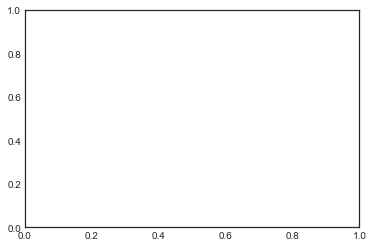

In [85]:
sns.boxplot( y=df_rape_viz)

In [ ]:
# Make boxplot for one group only
sns.boxplot( y=df["sepal_length"] )
#sns.plt.show()


In [ ]:
sns.boxplot(data=df_rape.ix[:,0:2])
#sns.plt.show()